In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt

DATA_DIR = 'cnn_results'
COLORS = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
COLORS = ["#7f7f7f", "#1f77b4"]


n = 84
n_train = int(np.ceil(n * .6))
n_test = n - n_train

In [2]:
data_frames = {}

for p in Path(DATA_DIR).iterdir():
    if p.suffixes[-1] != '.csv':
        continue
    
    data_frames[p.stem] = pd.read_csv(p)

In [3]:
def get_variable_stats(feature_prefix, variable, sample_size):
    selected_dfs = [v for k, v in data_frames.items() if k.startswith(feature_prefix)]
    
    epoch_count = selected_dfs[0].shape[0]
    experiment_count = len(selected_dfs)
    
    data = np.zeros((epoch_count, experiment_count))
    
    for index, df in enumerate(selected_dfs):
        data[:, index] = df[variable]
    
    m = np.mean(data, axis=1)
    sem = np.std(data, axis=1) / np.sqrt(sample_size)
    
    return data, m, sem
    
        

In [4]:
def plot_comparative_variables(ax, feature_prefixes, variable, sample_size):
    for index, feature_prefix in enumerate(feature_prefixes):
        data, m, sem = get_variable_stats(feature_prefix, variable, sample_size)
        x = range(1, data.shape[0]+1)

        ax.plot(x, m, color=COLORS[index], label=feature_prefix)
        ax.fill_between(x, m+sem, m-sem, color=COLORS[index], alpha=0.3)

    ax.grid(True)
    ax.title.set_text(variable)
    ax.legend()

# Language classification with context features

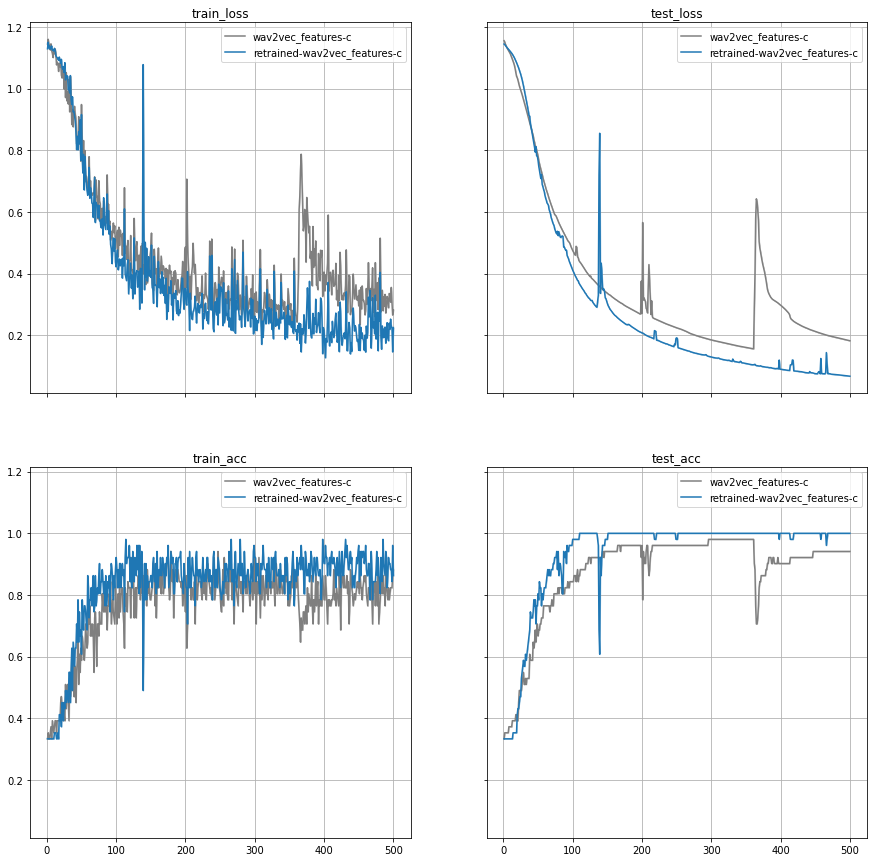

In [5]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 15))
sample_sizes = [n_train, n_test, n_train, n_test]
for index, variable in enumerate(['train_loss','test_loss','train_acc','test_acc']):
    #plt.subplot(2, 2, index+1, sharex=True, sharey=True)
    r = int(index/2)
    c = index%2
    sample_size = sample_sizes[index]
    plot_comparative_variables(
        axes[r, c],
        ['wav2vec_features-c', 'retrained-wav2vec_features-c'],
        variable,
        sample_size
    )
    

# Language Classification With Latent Features

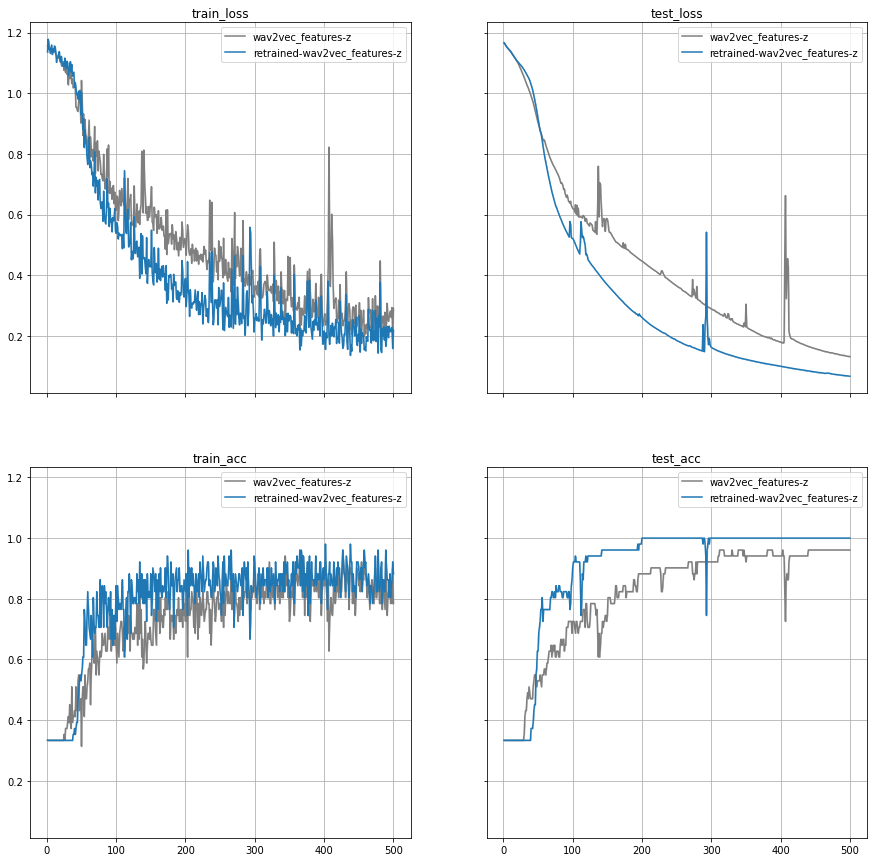

In [6]:
sample_sizes = [n_train, n_test, n_train, n_test]
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 15))
for index, variable in enumerate(['train_loss','test_loss','train_acc','test_acc']):
    #plt.subplot(2, 2, index+1, sharex=True, sharey=True)
    r = int(index/2)
    c = index%2
    sample_size = sample_sizes[index]
    plot_comparative_variables(
        axes[r, c],
        ['wav2vec_features-z', 'retrained-wav2vec_features-z'],
        variable,
        sample_size
    )
    